In [1]:
autosave 60

Autosaving every 60 seconds


In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn import metrics

In [9]:
df = pd.read_csv('car data.csv')

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [12]:
#lets copy the dataset
df1 = df

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
type(df.Car_Name)

pandas.core.series.Series

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
# let's check selling_price column

In [17]:
df.Selling_Price.unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [18]:
df.Selling_Price.max()

35.0

In [19]:
df.Selling_Price.min()

0.1

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [21]:
# let's check for duplicate values
df.duplicated().sum()

2

In [22]:
#lets remove duplicated data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [24]:
# we have 299 data points

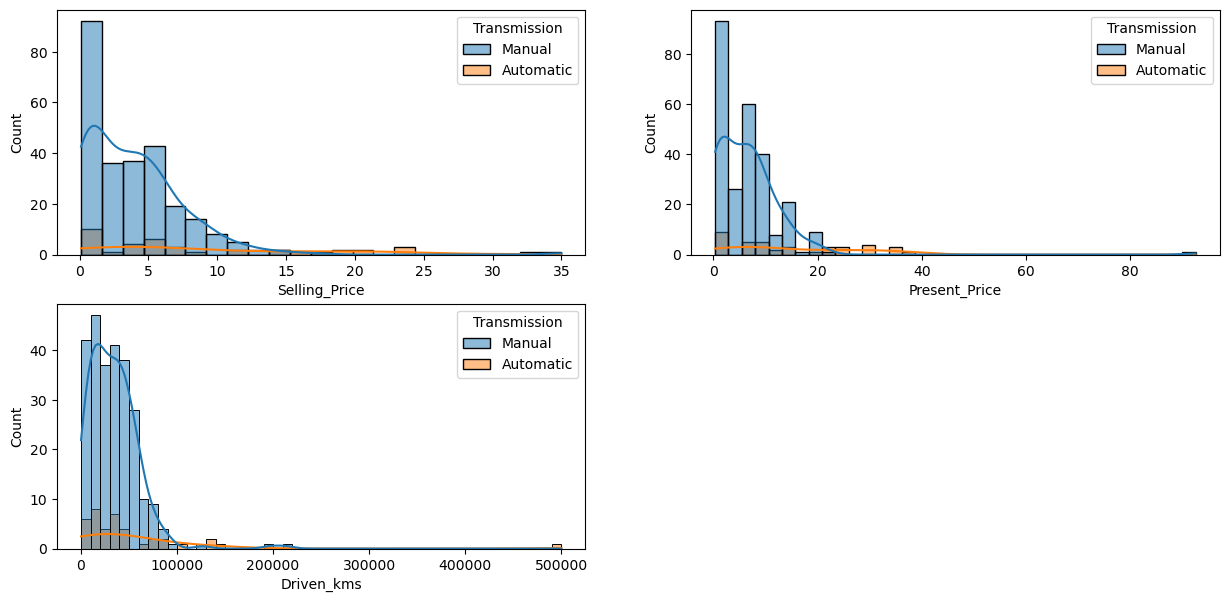

In [25]:
plt.figure(figsize=(15,7))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df, x=col, kde=True, hue='Transmission')

In [26]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [27]:
#lets convert fuel_type into numeric values

df['new_fuel_type'] = df['Fuel_Type'].astype('category')

In [28]:
df['new_fuel_type']

0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
296    Diesel
297    Petrol
298    Petrol
299    Diesel
300    Petrol
Name: new_fuel_type, Length: 299, dtype: category
Categories (3, object): ['CNG', 'Diesel', 'Petrol']

In [29]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,new_fuel_type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Petrol
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Diesel
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Petrol
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Petrol
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Diesel
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Diesel
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Petrol
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Petrol
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Diesel


In [30]:
df['new_fuel_type_cat'] = df['new_fuel_type'].cat.codes

In [31]:
df['new_fuel_type_cat']

0      2
1      1
2      2
3      2
4      1
      ..
296    1
297    2
298    2
299    1
300    2
Name: new_fuel_type_cat, Length: 299, dtype: int8

In [32]:
df.loc[34:38]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat
34,dzire,2014,5.50,8.06,45000,Diesel,Dealer,Manual,0,Diesel,1
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0,CNG,0
36,dzire,2015,4.65,7.20,48767,Petrol,Dealer,Manual,0,Petrol,2
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,Petrol,2
38,alto k10,2016,3.00,3.76,10079,Petrol,Dealer,Manual,0,Petrol,2


In [33]:
# Diesel =1 , Petrol =2, CNG = 0

In [37]:
enc = OneHotEncoder()

In [38]:
ans = enc.fit_transform(df[['Fuel_Type']])

In [39]:
print(enc.categories_)

[array(['CNG', 'Diesel', 'Petrol'], dtype=object)]


In [40]:
df[enc.categories_[0]] = ans.toarray()

In [41]:
df.iloc[25:60]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat,CNG,Diesel,Petrol
26,swift,2013,4.15,5.87,55138,Petrol,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
27,swift,2017,6.00,6.49,16200,Petrol,Individual,Manual,0,Petrol,2,0.0,0.0,1.0
28,alto k10,2010,1.95,3.95,44542,Petrol,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
29,ciaz,2015,7.45,10.38,45000,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
30,ritz,2012,3.10,5.98,51439,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
31,ritz,2011,2.35,4.89,54200,Petrol,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
32,swift,2014,4.95,7.49,39000,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
33,ertiga,2014,6.00,9.95,45000,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
34,dzire,2014,5.50,8.06,45000,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0,CNG,0,1.0,0.0,0.0


In [42]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0


In [43]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'new_fuel_type',
       'new_fuel_type_cat', 'CNG', 'Diesel', 'Petrol'],
      dtype='object')

In [45]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,0.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,0.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0,0.0,1.0,0.0
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0,0.0,0.0,1.0
298,city,2009,3.35,11.00,87934,Dealer,Manual,0,0.0,0.0,1.0
299,city,2017,11.50,12.50,9000,Dealer,Manual,0,0.0,1.0,0.0


In [46]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [47]:
enc = OneHotEncoder()

ans = enc.fit_transform(df[['Transmission']])

enc.categories_

df[enc.categories_[0]] = ans.toarray()

In [48]:
df = df.drop(columns='Transmission')

In [55]:
df = df.drop(columns='Selling_type')

In [56]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,sx4,2013,4.75,9.54,43000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,swift,2014,4.60,6.87,42450,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
297,brio,2015,4.00,5.90,60000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
298,city,2009,3.35,11.00,87934,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
299,city,2017,11.50,12.50,9000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [57]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Owner', 'CNG', 'Diesel', 'Petrol', 'Automatic', 'Manual', 'Dealer',
       'Individual'],
      dtype='object')

In [ ]:
x = df[[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Owner', 'CNG', 'Diesel', 'Petrol', 'Automatic', 'Manual', 'Dealer',
       'Individual']]]

In [54]:
df.iloc[20:80]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
21,ignis,2017,4.90,5.71,2400,Dealer,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
22,sx4,2011,4.40,8.01,50000,Dealer,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
23,alto k10,2014,2.50,3.46,45280,Dealer,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
24,wagon r,2013,2.90,4.41,56879,Dealer,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
25,swift,2011,3.00,4.99,20000,Dealer,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
26,swift,2013,4.15,5.87,55138,Dealer,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
27,swift,2017,6.00,6.49,16200,Individual,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
28,alto k10,2010,1.95,3.95,44542,Dealer,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
29,ciaz,2015,7.45,10.38,45000,Dealer,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
30,ritz,2012,3.10,5.98,51439,Dealer,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [50]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Owner,CNG,Diesel,Petrol,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,Dealer,0,0.0,0.0,1.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,Dealer,0,0.0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,Dealer,0,0.0,0.0,1.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,Dealer,0,0.0,0.0,1.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,Dealer,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,0,0.0,1.0,0.0,0.0,1.0
297,brio,2015,4.00,5.90,60000,Dealer,0,0.0,0.0,1.0,0.0,1.0
298,city,2009,3.35,11.00,87934,Dealer,0,0.0,0.0,1.0,0.0,1.0
299,city,2017,11.50,12.50,9000,Dealer,0,0.0,1.0,0.0,0.0,1.0


In [51]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Selling_type', 'Owner', 'CNG', 'Diesel', 'Petrol', 'Automatic',
       'Manual'],
      dtype='object')

In [52]:
df.Selling_type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [53]:
enc = OneHotEncoder()

ans = enc.fit_transform(df[['Selling_type']])

enc.categories_

df[enc.categories_[0]] = ans.toarray()

In [267]:
df.iloc[::,1:8]

,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel
0,2014,3.35,5.59,27000,0,0.0,0.0
1,2013,4.75,9.54,43000,0,0.0,1.0
2,2017,7.25,9.85,6900,0,0.0,0.0
3,2011,2.85,4.15,5200,0,0.0,0.0
4,2014,4.60,6.87,42450,0,0.0,1.0
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0.0,1.0
297,2015,4.00,5.90,60000,0,0.0,0.0
298,2009,3.35,11.00,87934,0,0.0,0.0
299,2017,11.50,12.50,9000,0,0.0,1.0


In [265]:
x = df.iloc[::,1:5]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,sx4,2013,4.75,9.54,43000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,swift,2014,4.60,6.87,42450,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
297,brio,2015,4.00,5.90,60000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
298,city,2009,3.35,11.00,87934,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
299,city,2017,11.50,12.50,9000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [59]:
y = df['Selling_Price']

In [60]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [61]:
columns = ['Year', 'Present_Price', 'Driven_kms',
       'Owner', 'CNG', 'Diesel', 'Petrol', 'Automatic', 'Manual', 'Dealer',
       'Individual']

In [62]:
x = pd.DataFrame(df, columns=columns)

In [64]:
from sklearn.linear_model import LinearRegression

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,sx4,2013,4.75,9.54,43000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,swift,2014,4.60,6.87,42450,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
297,brio,2015,4.00,5.90,60000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
298,city,2009,3.35,11.00,87934,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
299,city,2017,11.50,12.50,9000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [88]:
X_test

,Year,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
230,2013,9.400,45000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,2014,6.870,42450,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
218,2014,8.400,45078,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
27,2017,6.490,16200,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
229,2012,6.790,52132,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
228,2012,9.400,60000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
244,2013,9.400,49000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
113,2016,1.400,35000,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
271,2009,10.000,69562,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
95,2012,18.610,72000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [121]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.8)

In [122]:
X_train

,Year,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
172,2014,0.640,13700,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
248,2013,4.600,30000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
202,2015,5.700,28200,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
38,2016,3.760,10079,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
112,2014,2.400,7000,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
29,2015,10.380,45000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56,2015,7.270,40534,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
25,2011,4.990,20000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
94,2008,22.780,89000,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
101,2017,1.820,1400,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [123]:
y_train

172     0.40
248     4.00
202     4.40
38      3.00
112     1.15
29      7.45
56      4.50
25      3.00
94      4.00
101     1.70
6       6.75
71      4.50
157     0.48
208     7.90
277     9.70
230     6.15
265     6.50
276     8.65
169     0.40
15      7.75
285     7.40
98      7.05
278     6.00
246     3.75
79     14.50
268     4.80
106     1.35
105     1.35
19      2.65
186     0.25
190     0.20
85      2.50
119     1.05
142     0.60
50     14.90
102     1.65
72      7.45
243     6.25
176     0.35
217     3.15
258     8.40
68      4.35
89      4.75
221     4.50
261     5.50
293     3.25
279     6.25
177     0.35
150     0.50
249     5.25
257     8.50
21      4.90
8       8.75
123     1.00
61      4.50
54      2.75
183     0.27
207     5.15
33      6.00
Name: Selling_Price, dtype: float64

In [124]:
y_test

199    0.12
88     3.45
116    1.10
236    3.10
201    3.25
       ... 
18     3.25
163    0.45
27     6.00
204    2.75
196    0.17
Name: Selling_Price, Length: 240, dtype: float64

In [125]:
Lnc = LinearRegression

In [126]:
reg = LinearRegression().fit(X_train,y_train)

In [127]:
reg

LinearRegression()

In [128]:
reg.score(X_train,y_train)

0.8965739041003485

In [129]:
# we see the the model accuracy is 88% on training set

In [130]:
y_pred = reg.predict(X_test)

In [131]:
y_pred

array([ -2.05197763,   3.43795124,   0.56390584,   4.41422438,
         3.17829866,   1.33453753,   5.78989365,   7.42289793,
         2.17994712,   9.09846448,  -0.49119338,   6.24799371,
         2.21142951,   2.10678793,   8.88082781,   9.86542197,
         0.47582037,   5.49218941,  17.46520645,   2.24067058,
         0.20077512,   0.13807879,   3.36434912,   1.43206895,
         1.96195108,   2.10289868,   3.29137737,   0.95510378,
         2.5911756 ,   1.49999289,   7.64433257,   2.1650311 ,
         5.07067729,  10.98047036,   4.63735521,   6.01501187,
         4.51116189,   4.17964887,   2.93560472,   2.75715336,
         7.87624193,   3.71329221,   0.77222792,   6.61530179,
         4.1050816 ,   5.63654618,   7.20880022,   5.97957429,
         4.82049923,   4.57634729,   5.99378042,   4.6765501 ,
        15.66386621,   1.72826162,   0.26267613,   0.78393247,
         8.16014881,   0.62384681,   4.43420505,   1.80626075,
         7.40750324,   1.12896165,   5.26851666,   2.87

In [132]:
y_test

199    0.12
88     3.45
116    1.10
236    3.10
201    3.25
       ... 
18     3.25
163    0.45
27     6.00
204    2.75
196    0.17
Name: Selling_Price, Length: 240, dtype: float64

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
print(reg.coef_)

[ 3.11716041e-01  3.98616302e-01 -1.95409355e-05 -9.04102272e-01
 -1.11022302e-16  7.49786023e-01 -7.49786023e-01  8.80539505e-02
 -8.80539505e-02  6.60977917e-01 -6.60977917e-01]


In [135]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.2689477582113857
4.456816594770993
2.1111173806235866


In [136]:
print(reg.intercept_)

-625.3627819487531


In [137]:
# 73% accuracy on test

In [138]:
reg.feature_names_in_

array(['Year', 'Present_Price', 'Driven_kms', 'Owner', 'CNG', 'Diesel',
       'Petrol', 'Automatic', 'Manual', 'Dealer', 'Individual'],
      dtype=object)

In [139]:
df.iloc[2:20,:]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
2,ciaz,2017,7.25,9.85,6900,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,swift,2014,4.60,6.87,42450,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,vitara brezza,2018,9.25,9.83,2071,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,ciaz,2015,6.75,8.12,18796,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,s cross,2015,6.50,8.61,33429,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8,ciaz,2016,8.75,8.89,20273,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,ciaz,2015,7.45,8.92,42367,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
10,alto 800,2017,2.85,3.60,2135,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
11,ciaz,2015,6.85,10.38,51000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


<Axes: title={'center': 'Driven kms vs Price'}, xlabel='Transmission', ylabel='Selling_Price'>

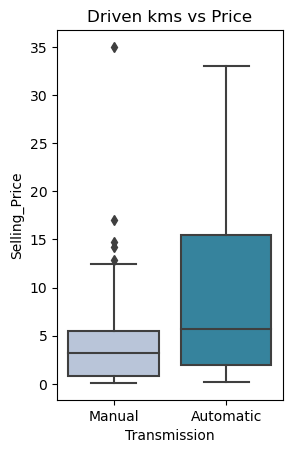

In [140]:
plt.subplot(1,2,2)
plt.title('Driven kms vs Price')
sns.boxplot(x=df1.Transmission, y=df1.Selling_Price, palette=("PuBuGn"))

In [181]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,Diesel,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0,Diesel,1,0.0,0.0,1.0
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0,Petrol,2,0.0,1.0,0.0
298,city,2009,3.35,11.00,87934,Dealer,Manual,0,Petrol,2,0.0,0.0,1.0
299,city,2017,11.50,12.50,9000,Dealer,Manual,0,Diesel,1,NaN,NaN,NaN


In [141]:
columns = ['Selling_Price','Present_Price','Kms_Driven','Age']
df1 = pd.DataFrame(df, columns=columns)

In [142]:
sns.heatmap(df.corr(),annot=True,lw=1, linecolor='white', cmap="crest")
plt.title('Features Correlation')
plt.show()

ValueError: could not convert string to float: 'ritz'

In [143]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,sx4,2013,4.75,9.54,43000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,swift,2014,4.60,6.87,42450,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
297,brio,2015,4.00,5.90,60000,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
298,city,2009,3.35,11.00,87934,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
299,city,2017,11.50,12.50,9000,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [170]:
pd.concat([df,enc_data],ignore_index=True)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat,CNG,Diesel,Petrol
0,ritz,2014.0,3.35,5.59,27000.0,Dealer,Manual,0.0,Petrol,2.0,NaN,NaN,NaN
1,sx4,2013.0,4.75,9.54,43000.0,Dealer,Manual,0.0,Diesel,1.0,NaN,NaN,NaN
2,ciaz,2017.0,7.25,9.85,6900.0,Dealer,Manual,0.0,Petrol,2.0,NaN,NaN,NaN
3,wagon r,2011.0,2.85,4.15,5200.0,Dealer,Manual,0.0,Petrol,2.0,NaN,NaN,NaN
4,swift,2014.0,4.60,6.87,42450.0,Dealer,Manual,0.0,Diesel,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0


In [182]:
enc_data.isna().any() 

CNG       False
Diesel    False
Petrol    False
dtype: bool

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Car_Name           299 non-null    object  
 1   Year               299 non-null    int64   
 2   Selling_Price      299 non-null    float64 
 3   Present_Price      299 non-null    float64 
 4   Driven_kms         299 non-null    int64   
 5   Selling_type       299 non-null    object  
 6   Transmission       299 non-null    object  
 7   Owner              299 non-null    int64   
 8   new_fuel_type      299 non-null    category
 9   new_fuel_type_cat  299 non-null    int8    
 10  Fuel_Type_CNG      297 non-null    float64 
 11  Fuel_Type_Diesel   297 non-null    float64 
 12  Fuel_Type_Petrol   297 non-null    float64 
dtypes: category(1), float64(5), int64(3), int8(1), object(3)
memory usage: 38.7+ KB


In [132]:
enc_data.columns=['CNG','Diesel','Petrol']

In [167]:
help(df.append)

Help on method append in module pandas.core.frame:

append(other, ignore_index=False, verify_integrity=False, sort=False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Append rows of `other` to the end of caller, returning a new object.
    
    Columns in `other` that are not in the caller are added as new columns.
    
    Parameters
    ----------
    other : DataFrame or Series/dict-like object, or list of these
        The data to append.
    ignore_index : bool, default False
        If True, the resulting axis will be labeled 0, 1, …, n - 1.
    verify_integrity : bool, default False
        If True, raise ValueError on creating index with duplicates.
    sort : bool, default False
        Sort columns if the columns of `self` and `other` are not aligned.
    
        .. versionadded:: 0.23.0
        .. versionchanged:: 1.0.0
    
            Changed to not sort by default.
    
    Returns
    -------
    DataFrame
    
    See Also
    --------
    concat :

In [163]:
df.append(enc_data,)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat,CNG,Diesel,Petrol
0,ritz,2014.0,3.35,5.59,27000.0,Dealer,Manual,0.0,Petrol,2.0,NaN,NaN,NaN
1,sx4,2013.0,4.75,9.54,43000.0,Dealer,Manual,0.0,Diesel,1.0,NaN,NaN,NaN
2,ciaz,2017.0,7.25,9.85,6900.0,Dealer,Manual,0.0,Petrol,2.0,NaN,NaN,NaN
3,wagon r,2011.0,2.85,4.15,5200.0,Dealer,Manual,0.0,Petrol,2.0,NaN,NaN,NaN
4,swift,2014.0,4.60,6.87,42450.0,Dealer,Manual,0.0,Diesel,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0


In [164]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,Petrol,2
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,Diesel,1
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,Petrol,2
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,Petrol,2
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,Diesel,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0,Diesel,1
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0,Petrol,2
298,city,2009,3.35,11.00,87934,Dealer,Manual,0,Petrol,2
299,city,2017,11.50,12.50,9000,Dealer,Manual,0,Diesel,1


In [140]:
df.iloc[20:80]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat
21,ignis,2017,4.90,5.71,2400,Petrol,Dealer,Manual,0,Petrol,2
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,Automatic,0,Petrol,2
23,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0,Petrol,2
24,wagon r,2013,2.90,4.41,56879,Petrol,Dealer,Manual,0,Petrol,2
25,swift,2011,3.00,4.99,20000,Petrol,Dealer,Manual,0,Petrol,2
26,swift,2013,4.15,5.87,55138,Petrol,Dealer,Manual,0,Petrol,2
27,swift,2017,6.00,6.49,16200,Petrol,Individual,Manual,0,Petrol,2
28,alto k10,2010,1.95,3.95,44542,Petrol,Dealer,Manual,0,Petrol,2
29,ciaz,2015,7.45,10.38,45000,Diesel,Dealer,Manual,0,Diesel,1
30,ritz,2012,3.10,5.98,51439,Diesel,Dealer,Manual,0,Diesel,1


In [146]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Petrol,2
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Diesel,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Petrol,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Petrol,2
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Diesel,1
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Diesel,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Petrol,2
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Petrol,2
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Diesel,1


In [147]:
enc_data

,CNG,Diesel,Petrol
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
294,0.0,1.0,0.0
295,0.0,0.0,1.0
296,0.0,0.0,1.0
297,0.0,1.0,0.0


In [148]:
# let's drop Fuel_Type column and add new columns

In [150]:
help(df.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equivalent to ``index=labels``).
    columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivale

In [161]:
enc_data.head()

,CNG,Diesel,Petrol
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [162]:
enc_data.tail()

,CNG,Diesel,Petrol
294,0.0,1.0,0.0
295,0.0,0.0,1.0
296,0.0,0.0,1.0
297,0.0,1.0,0.0
298,0.0,0.0,1.0


In [160]:
enc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CNG     299 non-null    float64
 1   Diesel  299 non-null    float64
 2   Petrol  299 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


In [155]:
df = df.drop(columns='Fuel_Type')

In [157]:
df.iloc[20:80]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat
21,ignis,2017,4.90,5.71,2400,Dealer,Manual,0,Petrol,2
22,sx4,2011,4.40,8.01,50000,Dealer,Automatic,0,Petrol,2
23,alto k10,2014,2.50,3.46,45280,Dealer,Manual,0,Petrol,2
24,wagon r,2013,2.90,4.41,56879,Dealer,Manual,0,Petrol,2
25,swift,2011,3.00,4.99,20000,Dealer,Manual,0,Petrol,2
26,swift,2013,4.15,5.87,55138,Dealer,Manual,0,Petrol,2
27,swift,2017,6.00,6.49,16200,Individual,Manual,0,Petrol,2
28,alto k10,2010,1.95,3.95,44542,Dealer,Manual,0,Petrol,2
29,ciaz,2015,7.45,10.38,45000,Dealer,Manual,0,Diesel,1
30,ritz,2012,3.10,5.98,51439,Dealer,Manual,0,Diesel,1


In [156]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,Petrol,2
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,Diesel,1
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,Petrol,2
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,Petrol,2
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,Diesel,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0,Diesel,1
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0,Petrol,2
298,city,2009,3.35,11.00,87934,Dealer,Manual,0,Petrol,2
299,city,2017,11.50,12.50,9000,Dealer,Manual,0,Diesel,1


In [154]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,new_fuel_type,new_fuel_type_cat
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Petrol,2
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Diesel,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Petrol,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Petrol,2
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Diesel,1
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Diesel,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Petrol,2
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Petrol,2
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Diesel,1


In [141]:
enc_data.iloc[20:80]

,CNG,Diesel,Petrol
20,0.0,0.0,1.0
21,0.0,0.0,1.0
22,0.0,0.0,1.0
23,0.0,0.0,1.0
24,0.0,0.0,1.0
25,0.0,0.0,1.0
26,0.0,0.0,1.0
27,0.0,0.0,1.0
28,0.0,1.0,0.0
29,0.0,1.0,0.0


Help on Index in module pandas.core.indexes.base object:

class Index(pandas.core.base.IndexOpsMixin, pandas.core.base.PandasObject)
 |  Index(data=None, dtype=None, copy=False, name=None, tupleize_cols=True, **kwargs) -> 'Index'
 |  
 |  Immutable ndarray implementing an ordered, sliceable set. The basic object
 |  storing axis labels for all pandas objects.
 |  
 |  Parameters
 |  ----------
 |  data : array-like (1-dimensional)
 |  dtype : NumPy dtype (default: object)
 |      If dtype is None, we find the dtype that best fits the data.
 |      If an actual dtype is provided, we coerce to that dtype if it's safe.
 |      Otherwise, an error will be raised.
 |  copy : bool
 |      Make a copy of input ndarray.
 |  name : object
 |      Name to be stored in the index.
 |  tupleize_cols : bool (default: True)
 |      When True, attempt to create a MultiIndex if possible.
 |  
 |  See Also
 |  --------
 |  RangeIndex : Index implementing a monotonic integer range.
 |  CategoricalIndex :

/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price', ylabel='Driven_kms'>

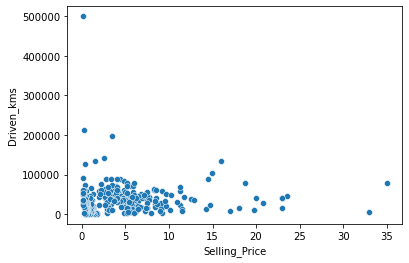

In [19]:
sns.scatterplot(df.Selling_Price,df.Driven_kms)

In [20]:
# we see that there are 4 numerical columns and 4 categorical column

In [21]:
# let's convert fuel_type column into 0 and 1's so machine learning can understand 

In [79]:
import sklearn.preprocessing as preprocessing

In [88]:
df['Fuel_Type'] = df['Fuel_Type'].astype('category')

In [93]:
df['Fuel_Type'
]

0      2
1      1
2      2
3      2
4      1
      ..
296    1
297    2
298    2
299    1
300    2
Name: Fuel_Type, Length: 301, dtype: category
Categories (3, int64): [0, 1, 2]

In [89]:
df['Fuel_Type_New'] = df['Fuel_Type'].cat.codes

In [90]:
enc = OneHotEncoder()

In [94]:
enc_data = pd.DataFrame(enc.fit_transform(df[['Fuel_Type_New']]).toarray())

In [96]:
df.head

<bound method NDFrame.head of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000         2   
1        sx4  2013           4.75           9.54       43000         1   
2       ciaz  2017           7.25           9.85        6900         2   
3    wagon r  2011           2.85           4.15        5200         2   
4      swift  2014           4.60           6.87       42450         1   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988         1   
297     brio  2015           4.00           5.90       60000         2   
298     city  2009           3.35          11.00       87934         2   
299     city  2017          11.50          12.50        9000         1   
300     brio  2016           5.30           5.90        5464         2   

    Selling_type Transmission  Owner  Fuel_Type_New  
0         Dealer       Manu

In [92]:
enc_data

,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
296,0.0,1.0,0.0
297,0.0,0.0,1.0
298,0.0,0.0,1.0
299,0.0,1.0,0.0


In [35]:
Fuel_Type = preprocessing.LabelEncoder() 